In [68]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Carregar a imagem usando o OpenCV
image_path = './circulo_cromatico.jpeg'
image = cv2.imread(image_path)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Definir os valores de matiz (m) e x
m = 120
x = 20

# Converter a imagem de BGR para HSV manualmente
image_rgb_normalized = image / 256.0
r_channel = image_rgb_normalized[:, :, 0]
g_channel = image_rgb_normalized[:, :, 1]
b_channel = image_rgb_normalized[:, :, 2]

In [69]:
v_channel = np.max(image_rgb_normalized, axis=2)
min_channel = np.min(image_rgb_normalized, axis=2)
s_channel = np.where(v_channel != 0, ((v_channel - min_channel) / v_channel), 0)

h_channel = np.zeros_like(v_channel)

delta = v_channel - min_channel
delta = np.where(delta == 0, 1e-9, delta)

# Calculando h_channel para diferentes casos
h_channel = np.where(v_channel == r_channel, (60 * (g_channel - b_channel) / delta), h_channel)
h_channel = np.where(v_channel == g_channel, (120 + 60 * (b_channel - r_channel) / delta), h_channel)
h_channel = np.where(v_channel == b_channel, (240 + 60 * (r_channel - g_channel) / delta), h_channel)


h_channel[h_channel < 0] += 360

# Aplicar a alteração na faixa de matizes
lower_bound = (m - x) % 360
upper_bound = (m + x) % 360
h_channel[((h_channel >= lower_bound) & (h_channel <= upper_bound))] = (h_channel[((h_channel >= lower_bound) & (h_channel <= upper_bound))] + 180) % 360

In [79]:
def hsv2rgb(h, s, v):
    
    """HSV to RGB
    
    :param float h: 0.0 - 360.0
    :param float s: 0.0 - 1.0
    :param float v: 0.0 - 1.0
    :return: rgb 
    :rtype: list
    
    """
    
    c = v * s
    x = c * (1 - abs(((h/60.0) % 2) - 1))
    m = v - c
    
    print(type(v))
    if 0.0 <= h < 60:
        rgb = (c, x, 0)
    elif 0.0 <= h < 120:
        rgb = (x, c, 0)
    elif 0.0 <= h < 180:
        rgb = (0, c, x)
    elif 0.0 <= h < 240:
        rgb = (0, x, c)
    elif 0.0 <= h < 300:
        rgb = (x, 0, c)
    elif 0.0 <= h < 360:
        rgb = (c, 0, x)
        
    return list(map(lambda n: (n + m) * 255, rgb))

In [80]:
teste_img = []
for i in range(len(h_channel)):
    teste_img.append(hsv2rgb(h_channel[i], s_channel[i], v_channel[i]))

<class 'numpy.ndarray'>


ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()

In [50]:
print(len(h_channel))
print(len(s_channel))
print(len(v_channel))

794
794
794


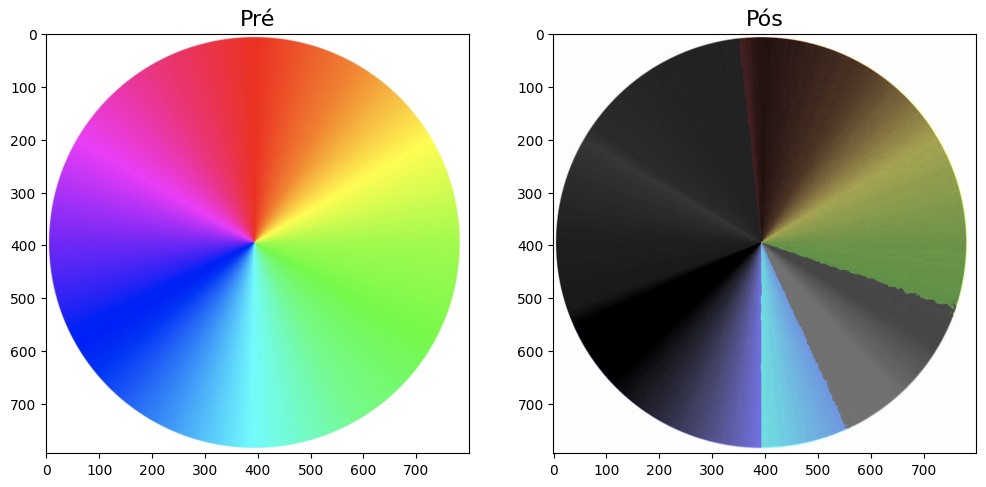

In [62]:
# Converter a imagem de volta para RGB manualmente
c = v_channel - s_channel
x = c * (1 - np.abs((h_channel / 60) % 2 - 1))
m = np.repeat(c[:, :, np.newaxis], 3, axis=2)

r_prime = np.where((0 <= h_channel) & (h_channel < 60), c, np.where((60 <= h_channel) & (h_channel < 120), x, 0))
g_prime = np.where((0 <= h_channel) & (h_channel < 60), x, np.where((60 <= h_channel) & (h_channel < 120), c, np.where((120 <= h_channel) & (h_channel < 180), x, 0)))
b_prime = np.where((120 <= h_channel) & (h_channel < 180), c, np.where((180 <= h_channel) & (h_channel < 240), x, 0))

image_rgb_modified = np.clip((m + np.stack((r_prime, g_prime, b_prime), axis=2)), 0, 1)

# Voltar ao intervalo [0, 255] e converter para inteiro de 8 bits
image_rgb_modified = (image_rgb_modified * 255).astype(np.uint8)



plt.figure(figsize = ((12, 6)))
plt.subplot(1, 2, 1)
plt.title("Pré", fontsize = 16)
plt.imshow(image)
plt.subplot(1, 2, 2)
plt.imshow(image_rgb_modified)
plt.title("Pós", fontsize = 16)
plt.show()